# Advanced Object Detection with Tensorflow API

Reference: https://github.com/priya-dwivedi/Deep-Learning

In [3]:
import os
import cv2
import time
import argparse
import multiprocessing
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [5]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

In [6]:
NUM_CLASSES = 90

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [7]:
def detect_objects(image_np, sess, detection_graph):
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

    # Each box represents a part of the image where a particular object was detected.
    boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    scores = detection_graph.get_tensor_by_name('detection_scores:0')
    classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')

    # Actual detection.
    (boxes, scores, classes, num_detections) = sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})

    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8)
    return image_np

In [8]:
# First test on images
PATH_TO_TEST_IMAGES_DIR = 'images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'teste-{}.jpg'.format(i)) for i in range(1, 7) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [9]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

(1900, 1268) (1268, 1900, 3)
(960, 960) (960, 960, 3)
(960, 543) (543, 960, 3)
(960, 720) (720, 960, 3)
(493, 335) (335, 493, 3)
(1000, 666) (666, 1000, 3)


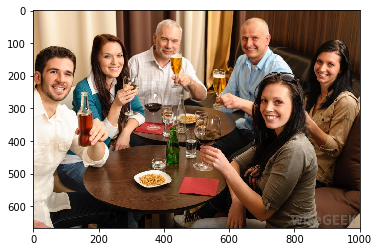

In [10]:
from PIL import Image
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    image_np = load_image_into_numpy_array(image)
    plt.imshow(image_np)
    print(image.size, image_np.shape)

In [11]:
#Load a frozen TF model 
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

(1268, 1900, 3)
(960, 960, 3)
(543, 960, 3)
(720, 960, 3)
(335, 493, 3)
(666, 1000, 3)


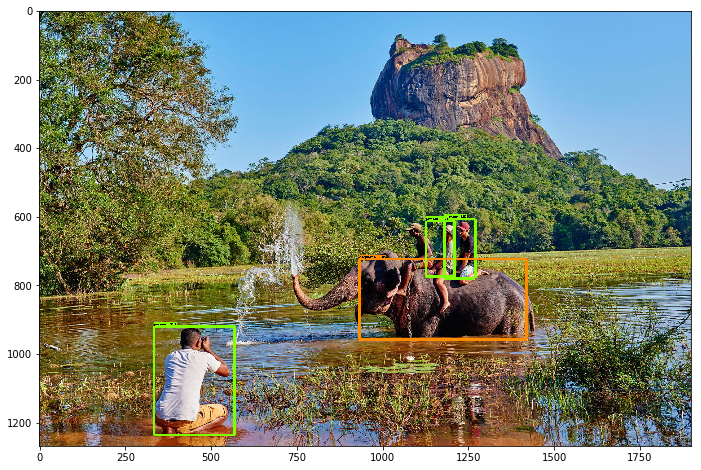

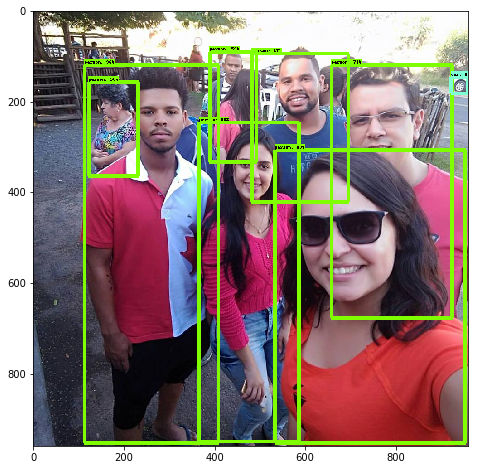

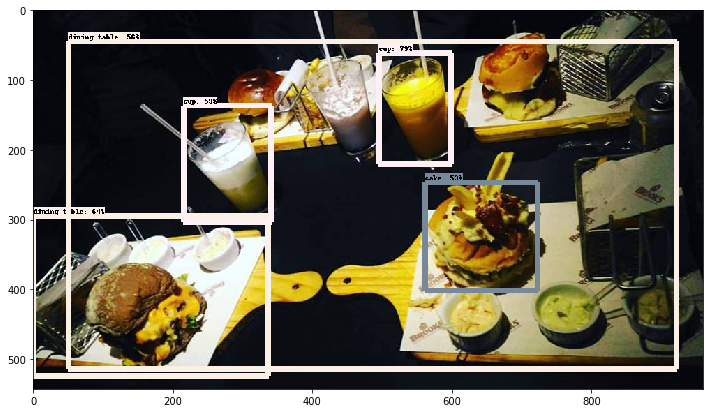

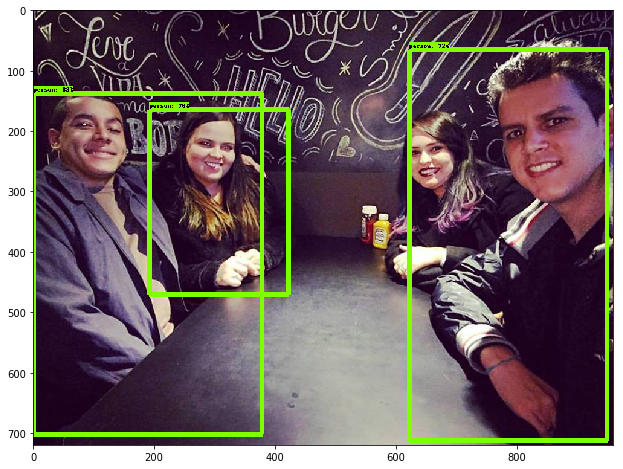

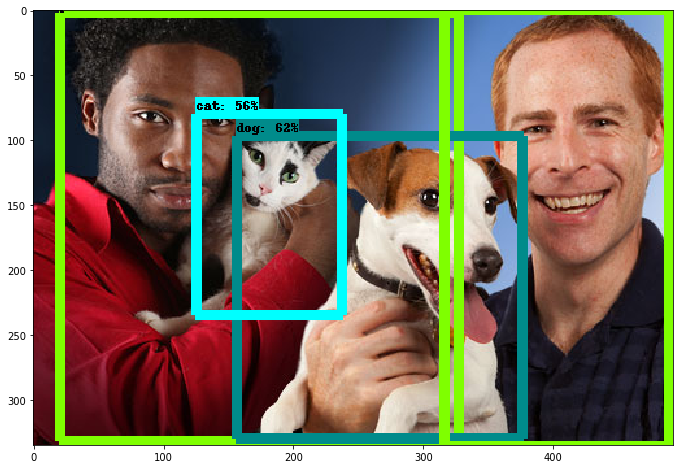

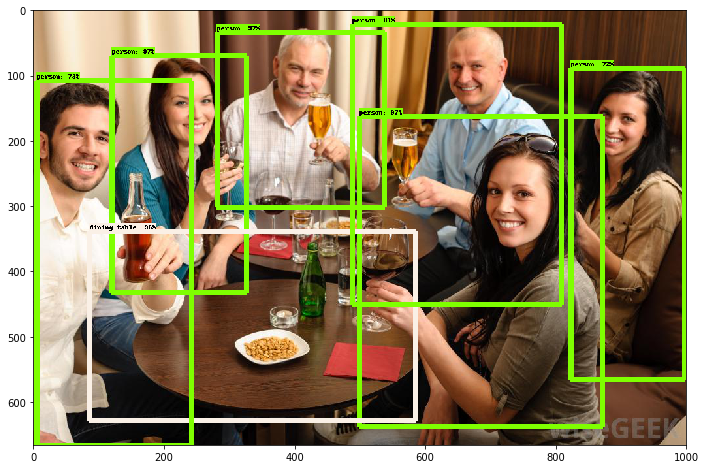

In [12]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_process = detect_objects(image_np, sess, detection_graph)
            print(image_process.shape)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_process)
      

In [13]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [14]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # you should return the final output (image with lines are drawn on lanes)
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            image_process = detect_objects(image, sess, detection_graph)
            return image_process

In [34]:
white_output = 'videos/1_out.mp4'
clip1 = VideoFileClip("videos/1.mp4").subclip(0,7)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!s
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video videos/1_out.mp4
[MoviePy] Writing video videos/1_out.mp4



100%|█████████▉| 210/211 [10:34:36<40:55, 2455.77s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: videos/1_out.mp4 

CPU times: user 25min 57s, sys: 4min 45s, total: 30min 42s
Wall time: 10h 34min 37s


In [35]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [ ]:
white_output1 = 'videos/2_out.mp4'
clip1 = VideoFileClip("videos/2.mp4").subclip(0,18)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!s
%time white_clip.write_videofile(white_output1, audio=False)

[MoviePy] >>>> Building video videos/2_out.mp4
[MoviePy] Writing video videos/2_out.mp4


 12%|█▏        | 64/540 [22:09:11<55:53:02, 422.65s/it]  

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output1))

In [15]:
white_output2 = 'videos/3_out.mp4'
clip2 = VideoFileClip("videos/3.mp4").subclip(0,59)
white_clip = clip2.fl_image(process_image) #NOTE: this function expects color images!!s
%time white_clip.write_videofile(white_output2, audio=False)

[MoviePy] >>>> Building video videos/3_out.mp4
[MoviePy] Writing video videos/3_out.mp4


100%|██████████| 1415/1415 [6:29:47<00:00,  8.40s/it]     


[MoviePy] Done.
[MoviePy] >>>> Video ready: videos/3_out.mp4 

CPU times: user 2h 54min 59s, sys: 34min 6s, total: 3h 29min 5s
Wall time: 6h 29min 50s


In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output2))

In [ ]:
white_output = 'videos/4_out.mp4'
clip = VideoFileClip("videos/4.mp4").subclip(0,59)
white_clip = clip.fl_image(process_image) #NOTE: this function expects color images!!s
%time white_clip.write_videofile(white_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))